# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [2]:
#! pip install torch

In [3]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [4]:
import random

random.seed(42)

X=torch.rand(4, 3)
Y=torch.rand(4, 3)

print(f"X \n{X}")
print(f"Y \n{Y}")

# 행으로 병합 코드
row_merge=torch.cat((X, Y), dim=0)
print(f"Merged by row \n{row_merge}")

# 열로 병합 코드
col_merge=torch.cat((X, Y), dim=1)
print(f"Merged by column \n {col_merge}")

X 
tensor([[0.5664, 0.9034, 0.8156],
        [0.2493, 0.7528, 0.9798],
        [0.6514, 0.6104, 0.6428],
        [0.9690, 0.4572, 0.3797]])
Y 
tensor([[0.8123, 0.1550, 0.6578],
        [0.5755, 0.7968, 0.5714],
        [0.6669, 0.4627, 0.8454],
        [0.1101, 0.6544, 0.3038]])
Merged by row 
tensor([[0.5664, 0.9034, 0.8156],
        [0.2493, 0.7528, 0.9798],
        [0.6514, 0.6104, 0.6428],
        [0.9690, 0.4572, 0.3797],
        [0.8123, 0.1550, 0.6578],
        [0.5755, 0.7968, 0.5714],
        [0.6669, 0.4627, 0.8454],
        [0.1101, 0.6544, 0.3038]])
Merged by column 
 tensor([[0.5664, 0.9034, 0.8156, 0.8123, 0.1550, 0.6578],
        [0.2493, 0.7528, 0.9798, 0.5755, 0.7968, 0.5714],
        [0.6514, 0.6104, 0.6428, 0.6669, 0.4627, 0.8454],
        [0.9690, 0.4572, 0.3797, 0.1101, 0.6544, 0.3038]])


### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [5]:
#! pip install --upgrade pip

In [6]:
#! pip install d2l

In [7]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [8]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [9]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3070,  0.3424]) 
label: tensor([4.0572])


In [10]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [11]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.0040e+00, -1.1041e+00],
        [ 1.7736e-03, -7.8571e-01],
        [-2.6284e+00, -1.6668e-02],
        [-1.4085e+00, -6.9806e-01],
        [-2.4025e-01, -1.8008e+00],
        [ 2.1151e-01, -1.3948e+00],
        [-1.6040e+00, -5.0209e-01],
        [ 7.0501e-01,  1.7417e+00],
        [ 2.4600e+00,  9.2965e-01],
        [-1.2080e+00, -1.3926e-01],
        [ 7.2483e-01, -2.8311e-01],
        [-2.7586e-01, -1.5653e-01],
        [-4.0325e-01, -1.8808e+00],
        [-1.0841e+00,  1.9510e+00],
        [ 5.5160e-01,  1.7517e+00],
        [-3.9500e-02, -4.3283e-01],
        [ 2.8310e-01, -1.4380e+00],
        [-1.2721e+00, -1.1788e+00],
        [ 1.9981e+00,  1.1008e+00],
        [ 1.0983e+00,  7.6666e-01]]) 
 tensor([[ 4.1423],
        [ 6.6821],
        [-2.3465],
        [ 2.3329],
        [ 7.4750],
        [ 8.2331],
        [ 1.4373],
        [ 5.0059],
        [11.4966],
        [ 2.0925],
        [ 8.1082],
        [ 4.9023],
        [ 7.1142],
        [-0.6871],
        [ 4

In [12]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([0])#원하는 실수를 넣어주세요

In [13]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [14]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat - y)**2)

In [15]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            if param.grad is not None: 
                param -= lr * param.grad / batch_size
                param.grad.zero_()

In [16]:
lr = 0.01
num_epochs = 50
net = linreg
loss = squared_loss

w_list=[]
l_list=[]

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        
        w_list.append(w.detach().numpy().copy()) 
        l_list.append(float(train_l.mean()))

epoch 1, loss 38.720753
epoch 2, loss 37.179298
epoch 3, loss 35.918709
epoch 4, loss 34.887508
epoch 5, loss 34.041553
epoch 6, loss 33.350891
epoch 7, loss 32.787277
epoch 8, loss 32.326180
epoch 9, loss 31.947897
epoch 10, loss 31.637262
epoch 11, loss 31.382780
epoch 12, loss 31.175211
epoch 13, loss 31.004635
epoch 14, loss 30.866262
epoch 15, loss 30.752981
epoch 16, loss 30.660015
epoch 17, loss 30.583698
epoch 18, loss 30.521025
epoch 19, loss 30.470165
epoch 20, loss 30.428219
epoch 21, loss 30.394011
epoch 22, loss 30.366318
epoch 23, loss 30.342834
epoch 24, loss 30.324003
epoch 25, loss 30.307884
epoch 26, loss 30.295282
epoch 27, loss 30.284864
epoch 28, loss 30.276468
epoch 29, loss 30.269390
epoch 30, loss 30.264000
epoch 31, loss 30.259361
epoch 32, loss 30.255648
epoch 33, loss 30.252510
epoch 34, loss 30.250031
epoch 35, loss 30.247858
epoch 36, loss 30.246111
epoch 37, loss 30.244783
epoch 38, loss 30.243620
epoch 39, loss 30.242632
epoch 40, loss 30.241884
epoch 41,

In [17]:
w_list[:10]

[array([[ 0.28359205],
        [-0.14139944]], dtype=float32),
 array([[ 0.53290534],
        [-0.26395905]], dtype=float32),
 array([[ 0.75825363],
        [-0.37483308]], dtype=float32),
 array([[ 0.96225977],
        [-0.47460428]], dtype=float32),
 array([[ 1.1469797],
        [-0.5656799]], dtype=float32),
 array([[ 1.3142326 ],
        [-0.64680916]], dtype=float32),
 array([[ 1.4644958],
        [-0.7211735]], dtype=float32),
 array([[ 1.6005327],
        [-0.7879993]], dtype=float32),
 array([[ 1.7242357 ],
        [-0.84780276]], dtype=float32),
 array([[ 1.8360295],
        [-0.9030678]], dtype=float32)]

In [18]:
l_list[:10]

[38.72075271606445,
 37.179298400878906,
 35.91870880126953,
 34.887508392333984,
 34.04155349731445,
 33.35089111328125,
 32.78727722167969,
 32.32617950439453,
 31.94789695739746,
 31.63726234436035]

In [19]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.1235, -0.0834], grad_fn=<SubBackward0>)
error in estimating b: tensor([5.5000])


\+ cost graph 그리기 (x축 w, y축 loss)

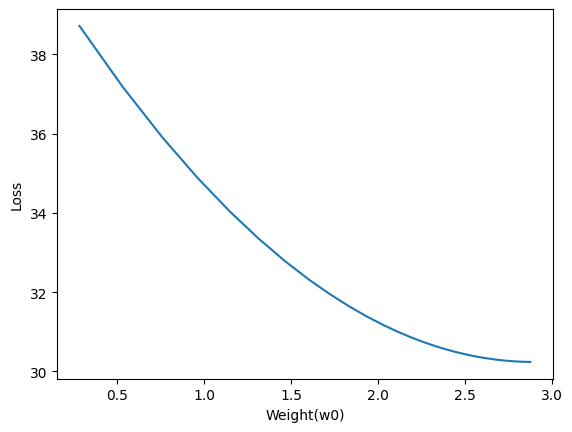

In [20]:
import matplotlib.pyplot as plt
import numpy as np

w_list_n=np.array(w_list)
l_list_n=np.array(l_list)

plt.plot(w_list_n[:, 0], l_list_n)
plt.xlabel('Weight(w0)')
plt.ylabel('Loss')
plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [21]:
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [22]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [23]:
next(iter(data_iter))

[tensor([[ 0.4043,  0.5056],
         [-0.1689,  0.8111],
         [ 2.2652,  0.8988],
         [-1.3034,  1.3515],
         [ 0.2084, -0.0411],
         [-0.4501, -0.9921],
         [-0.6226, -0.4954],
         [-1.6069,  1.0765],
         [-0.8715, -0.9102],
         [ 0.1581, -0.7074],
         [ 0.8548,  1.3807],
         [ 1.2926,  0.1981],
         [-0.8576,  0.9699],
         [-0.6992, -0.2044],
         [-0.4577,  0.0954],
         [ 0.9921, -0.5464],
         [-0.5158,  1.5251],
         [-0.7038, -0.7649],
         [ 0.5437,  0.5139],
         [-0.9496,  1.0568]]),
 tensor([[ 5.9461],
         [ 3.7683],
         [10.9490],
         [-0.4454],
         [ 6.1846],
         [ 5.6377],
         [ 4.3687],
         [-0.9410],
         [ 4.2424],
         [ 7.0372],
         [ 5.9904],
         [ 9.0718],
         [ 1.4587],
         [ 3.7134],
         [ 3.9957],
         [ 9.2878],
         [ 1.6609],
         [ 4.5353],
         [ 6.3739],
         [ 1.0678]])]

In [24]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [25]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [26]:
loss = nn.MSELoss()

In [27]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01)

In [28]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.755776
epoch 2, loss 0.014035
epoch 3, loss 0.000351


In [29]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0078, -0.0037])
error in estimating b: tensor([0.0134])
